<a href="https://colab.research.google.com/github/cypherkrish/Bengaluru-House-price-data/blob/main/StartupProfitPred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/cypherkrish/DataScienceprojects/main/50_Startups.csv?token=GHSAT0AAAAAACRW2YJLYU4DRU5ET4Y52QQYZSRS34A')

In [4]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [7]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [9]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


<Axes: ylabel='R&D Spend'>

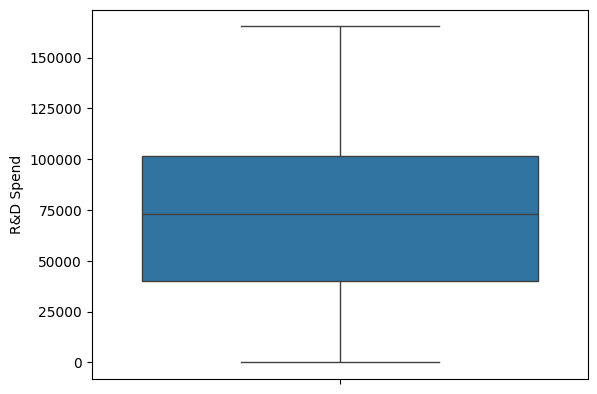

In [13]:
sns.boxplot(df['R&D Spend'])

<Axes: ylabel='Administration'>

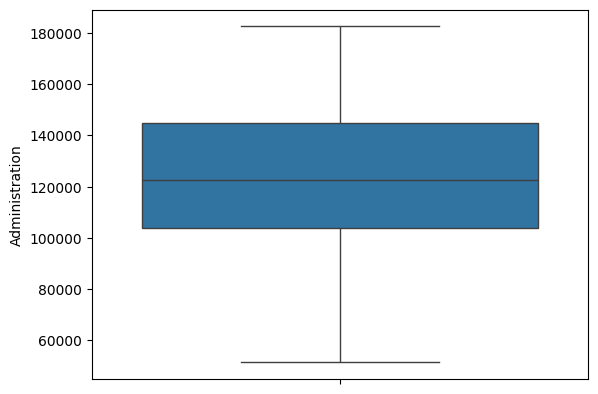

In [14]:
sns.boxplot(df['Administration'])

<Axes: ylabel='Marketing Spend'>

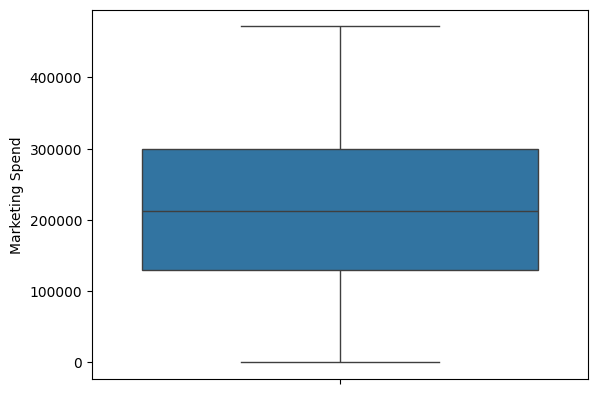

In [15]:
sns.boxplot(df['Marketing Spend'])

<Axes: ylabel='Profit'>

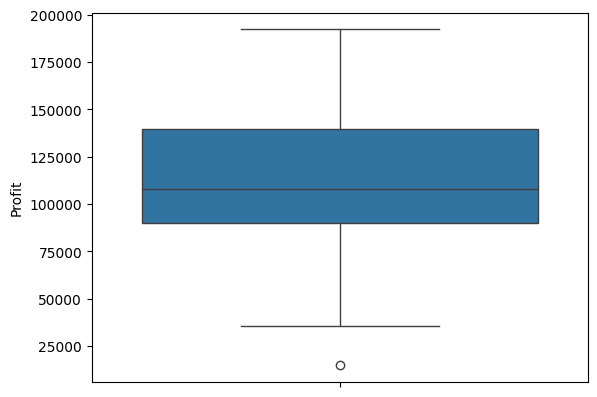

In [16]:
sns.boxplot(df['Profit'])

In [17]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [24]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'], dtype='object')

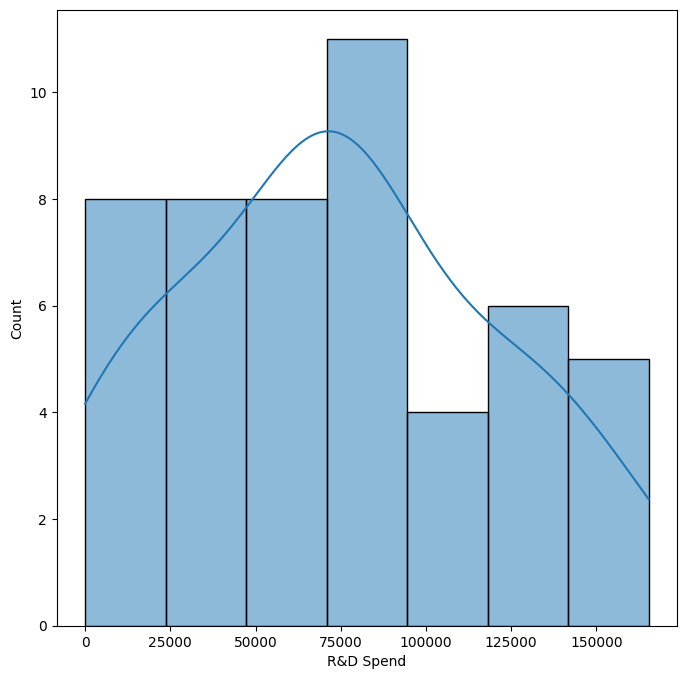

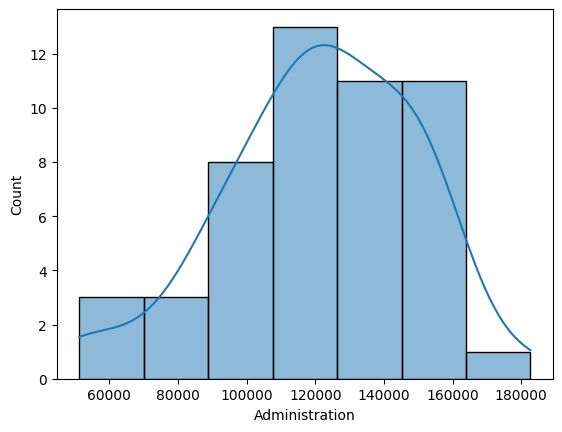

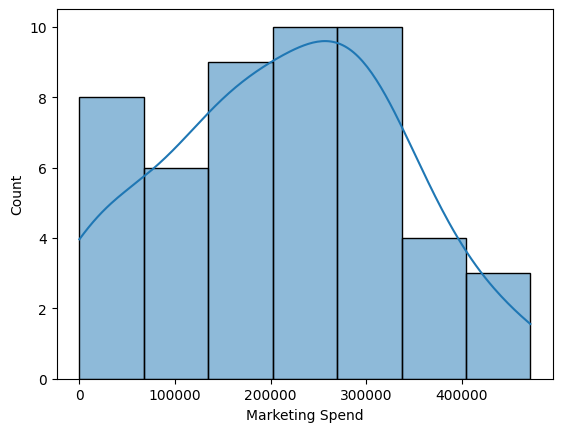

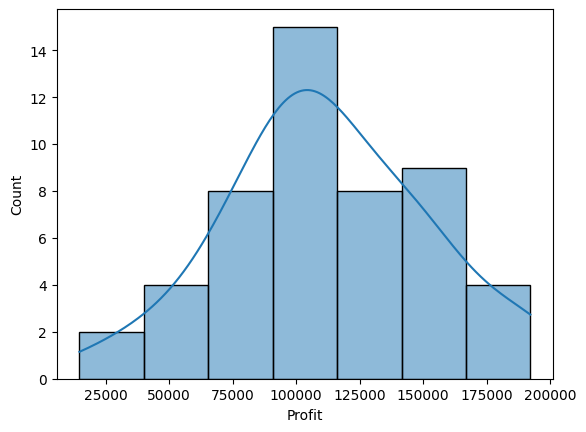

In [30]:
plt.figure(figsize=(8, 8))
for i in df.columns:
  sns.histplot(df[i], kde=True)
  plt.show()
  print("\n")

In [31]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<Axes: >

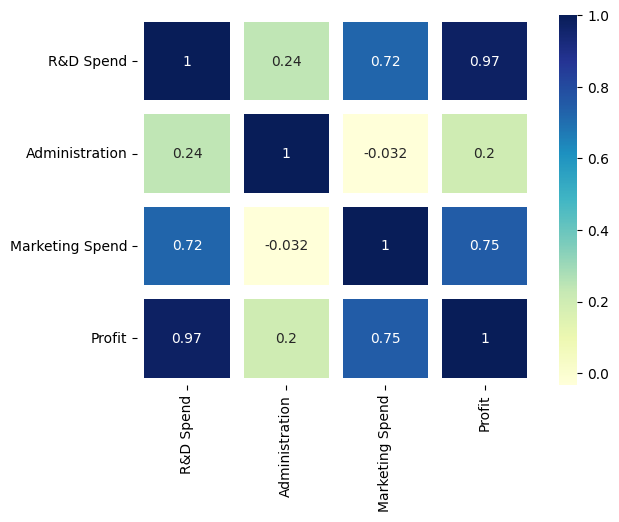

In [36]:
sns.heatmap(df.corr(), annot = True, cmap='YlGnBu', linewidths=10)

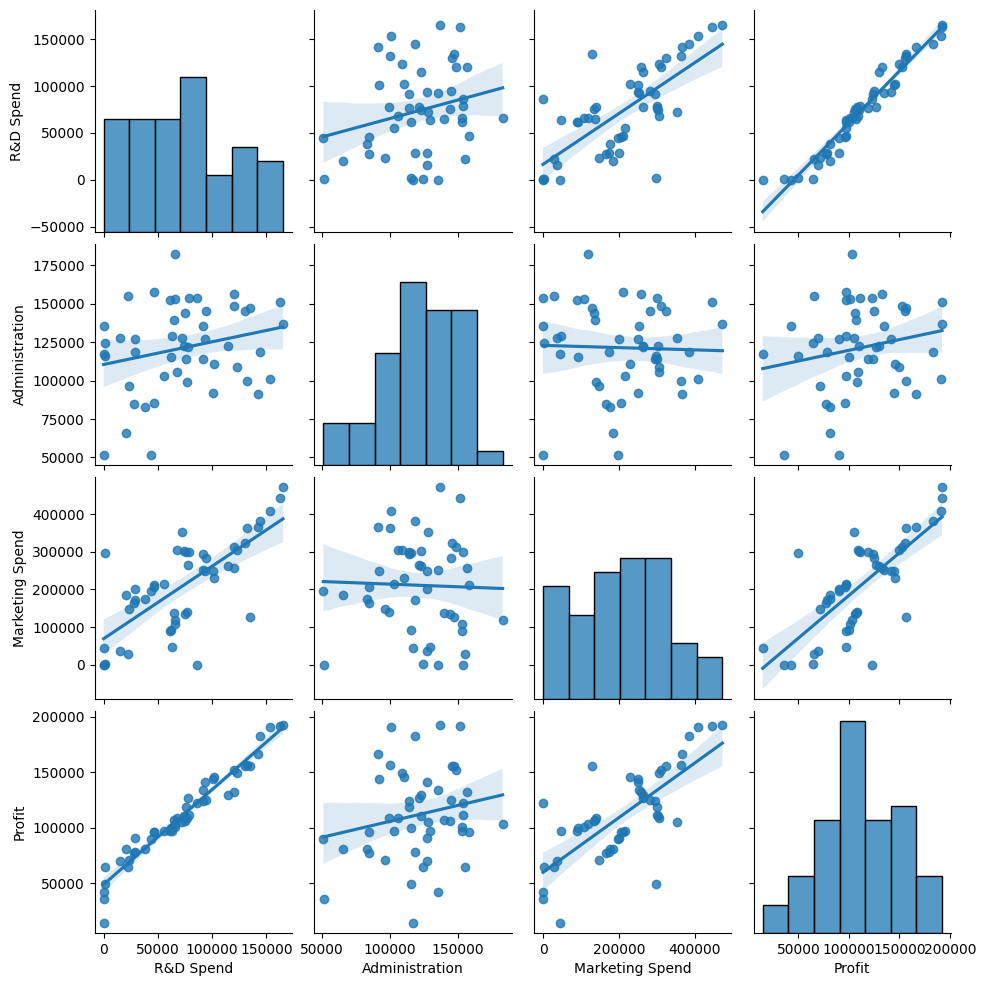

In [39]:
sns.pairplot(data=df, kind='reg')

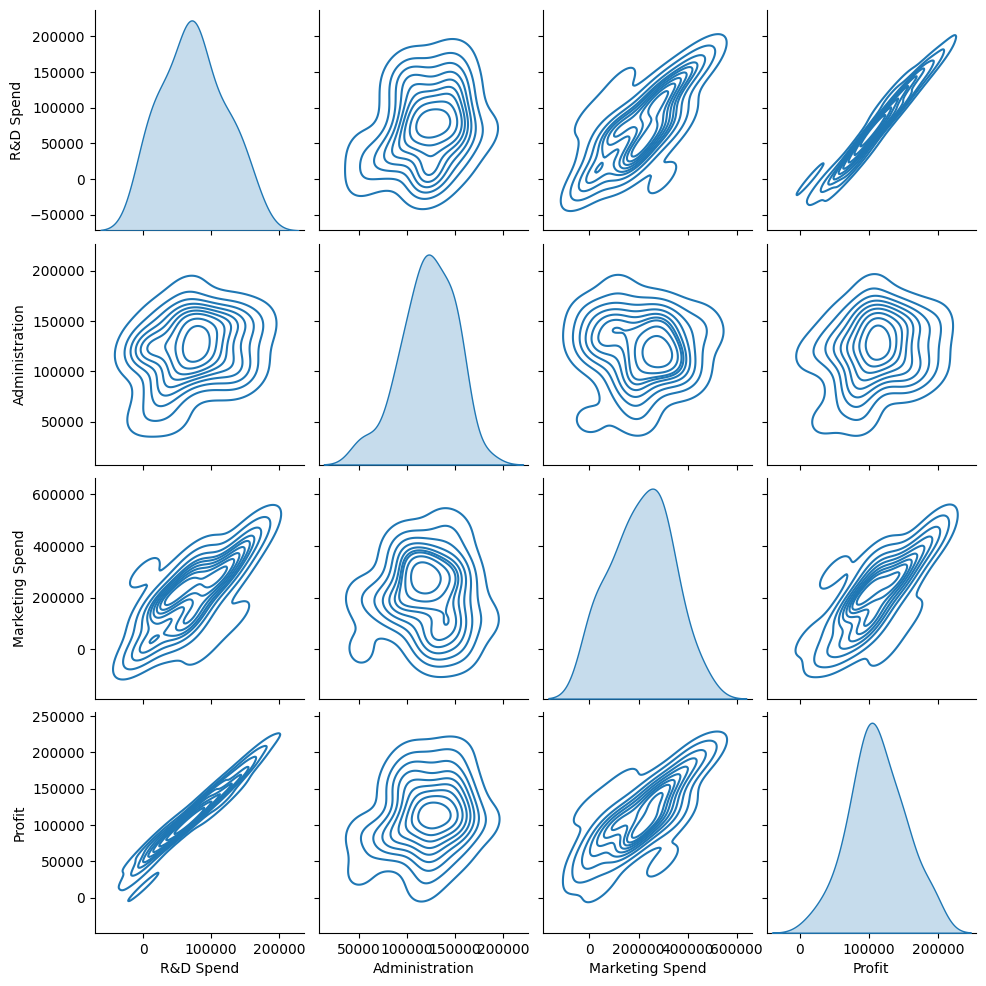

In [40]:
sns.pairplot(data=df, kind='kde')

In [41]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'], dtype='object')

In [42]:
X = df.drop(labels = ['Profit'], axis = 1)  # Features

In [44]:
y = df['Profit']  # Label

In [45]:
X.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [46]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [48]:
# Handling the missing value => Simple Imputer (median)
# Feature scaling  => StandardScalr / MinMaxScalar

In [50]:
from sklearn.impute import SimpleImputer  # Handeling missing values
from sklearn.preprocessing import StandardScaler  # Feature scaling

In [56]:
num_columns = X.columns[X.dtypes != 'object']

In [58]:
num_columns

Index(['R&D Spend', 'Administration', 'Marketing Spend'], dtype='object')

In [59]:
# Create pipeling

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [67]:
num_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy = 'median')),
        ('scalar', StandardScaler()),
    ]
)

In [68]:
data_preprocessing = ColumnTransformer([
        ('num_pipeline', num_pipeline, num_columns)
    ]
)

In [69]:
X_transform = data_preprocessing.fit_transform(X)

In [71]:
X.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [73]:
X_transform[:5]

array([[ 2.01641149,  0.56075291,  2.15394309],
       [ 1.95586034,  1.08280658,  1.9236004 ],
       [ 1.75436374, -0.72825703,  1.62652767],
       [ 1.55478369, -0.09636463,  1.42221024],
       [ 1.5049372 , -1.07991935,  1.28152771]])

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size = 0.2, random_state = 42)

In [77]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(40, 3)
(10, 3)
(40,)
(10,)


In [80]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [81]:
Linear_Reg = LinearRegression()
Linear_Reg.fit(X_train, y_train)

LinearRegression()

In [83]:
Linear_Reg.coef_

array([36524.46619483, -1884.09781154,  3782.14001043])

In [85]:
Linear_Reg.intercept_

111677.69167216848

In [86]:
y_pred = Linear_Reg.predict(X_test)

In [88]:
mae = mean_absolute_error(y_test, y_pred)

In [89]:
mae

6979.152252370402

In [91]:
mse = mean_squared_error(y_test, y_pred)
mse

80926321.22295164

In [92]:
rmse = np.sqrt(mse)
rmse

8995.905803361418

In [93]:
r2 = r2_score(y_test, y_pred)
r2

0.900065308303732

In [95]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [99]:
model = {

              'LinearRegression' : LinearRegression(),
              'Ridge' : Ridge(),
              'Lasso' : Lasso(),
              'ElasticNet' : ElasticNet(),
              'DecisionTreeRegressor' : DecisionTreeRegressor(random_state= 0),
              'RandomForestRegressor' : RandomForestRegressor(n_estimators=10, random_state=0),
              'SVR_rbf' : SVR(kernel='rbf'),
              'SVR_linear' : SVR(kernel='linear'),
              'SVR_poly' : SVR(kernel='poly'),
              'SVR_sigmoid' : SVR(kernel='sigmoid')
}

In [100]:
def model_evaluation(y_test, y_pred):
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, y_pred)
  return mae, mse, rmse, r2

In [107]:
for i in model.keys():
  print(i, ' ', model[i])

LinearRegression   LinearRegression()
Ridge   Ridge()
Lasso   Lasso()
ElasticNet   ElasticNet()
DecisionTreeRegressor   DecisionTreeRegressor(random_state=0)
RandomForestRegressor   RandomForestRegressor(n_estimators=10, random_state=0)
SVR_rbf   SVR()
SVR_linear   SVR(kernel='linear')
SVR_poly   SVR(kernel='poly')
SVR_sigmoid   SVR(kernel='sigmoid')


In [121]:
result_df = pd.DataFrame(columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score'])

for i in model.keys():
  model[i].fit(X_train, y_train)
  y_pred = model[i].predict(X_test)
  mae, mse, rmse, r2 = model_evaluation(y_test, y_pred)
  print(i, ' ', mae, mse, rmse, r2)
  result_df.loc[len(result_df.index)] = [i, mae, mse, rmse, r2]

LinearRegression   6979.152252370402 80926321.22295164 8995.905803361418 0.900065308303732
Ridge   7340.298207954923 83585285.93530898 9142.498888996868 0.8967817929437711
Lasso   6978.4186489346175 80907058.7526375 8994.835115366901 0.9000890952373657
ElasticNet   8746.949023284376 124687175.62553468 11166.341192419954 0.8460256902042118
DecisionTreeRegressor   9982.975999999995 161851110.35489988 12722.071779191465 0.800132508563502
RandomForestRegressor   8387.832299999998 123346212.92534688 11106.13402248266 0.8476816247875999
SVR_rbf   22846.846307341435 955624159.7680969 30913.171299109654 -0.180085840314276
SVR_linear   22807.346870417306 952451425.9744005 30861.81177400965 -0.17616787927618716
SVR_poly   22827.569375937164 952980091.8764979 30870.37563549394 -0.17682072081325506
SVR_sigmoid   22840.14627952084 955084162.5932856 30904.435969505827 -0.17941900595969118


In [122]:
result_df

,Model,MAE,MSE,RMSE,R2 Score
0,LinearRegression,6979.152252,8.092632e+07,8995.905803,0.900065
1,Ridge,7340.298208,8.358529e+07,9142.498889,0.896782
2,Lasso,6978.418649,8.090706e+07,8994.835115,0.900089
3,ElasticNet,8746.949023,1.246872e+08,11166.341192,0.846026
4,DecisionTreeRegressor,9982.976000,1.618511e+08,12722.071779,0.800133
5,RandomForestRegressor,8387.832300,1.233462e+08,11106.134022,0.847682
6,SVR_rbf,22846.846307,9.556242e+08,30913.171299,-0.180086
7,SVR_linear,22807.346870,9.524514e+08,30861.811774,-0.176168
8,SVR_poly,22827.569376,9.529801e+08,30870.375635,-0.176821
9,SVR_sigmoid,22840.146280,9.550842e+08,30904.435970,-0.179419


In [123]:
result_df['R2 Score'].max()

0.9000890952373657

In [131]:
selected_model = result_df[result_df['R2 Score'] == result_df['R2 Score'].max()]['Model'].to_string(index=False)

In [132]:
selected_model

'Lasso'

In [136]:
print('Based on "R2 Score" the best model is', selected_model ,
      '\nMAE value: ', result_df[result_df['R2 Score'] == result_df['R2 Score'].max()]['MAE'].to_string(index=False) ,
      '\nMSE Value: ', result_df[result_df['R2 Score'] == result_df['R2 Score'].max()]['MSE'].to_string(index=False),
      '\nRMSE Value: ', result_df[result_df['R2 Score'] == result_df['R2 Score'].max()]['RMSE'].to_string(index=False),
      '\nR2 Score: ', result_df[result_df['R2 Score'] == result_df['R2 Score'].max()]['R2 Score'].to_string(index=False))

Based on "R2 Score" the best model is Lasso 
MAE value:  6978.418649 
MSE Value:  8.090706e+07 
RMSE Value:  8994.835115 
R2 Score:  0.900089


In [137]:
  lasso_reg = Lasso()
  lasso_reg.fit(X_train, y_train)

Lasso()

In [139]:
y_pred_lasso = lasso_reg.predict(X_test)

In [140]:
r2_score(y_test, y_pred_lasso)

0.9000890952373657

In [141]:
inputvalues = pd.DataFrame([["1000", "2850.0", "5000"]], columns=['R&D Spend', 'Administration', 'Marketing Spend'])

In [143]:
lasso_reg.predict(inputvalues)[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


50158265.07778943

In [144]:
import pickle

In [146]:
pickle.dump(lasso_reg, open('lassoModel.pkl', 'wb'))